In [1]:
import numpy as np

# Question 1

In [2]:
from keras.datasets import fashion_mnist

2025-02-26 15:35:19.157292: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
np.amin(train_labels), np.amax(train_labels)

(0, 9)

In [5]:
import matplotlib.pyplot as plt

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
def plot_images(images, labels):
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[np.random.choice(np.where(labels==i)[0])], cmap='gray')
        plt.title(class_names[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

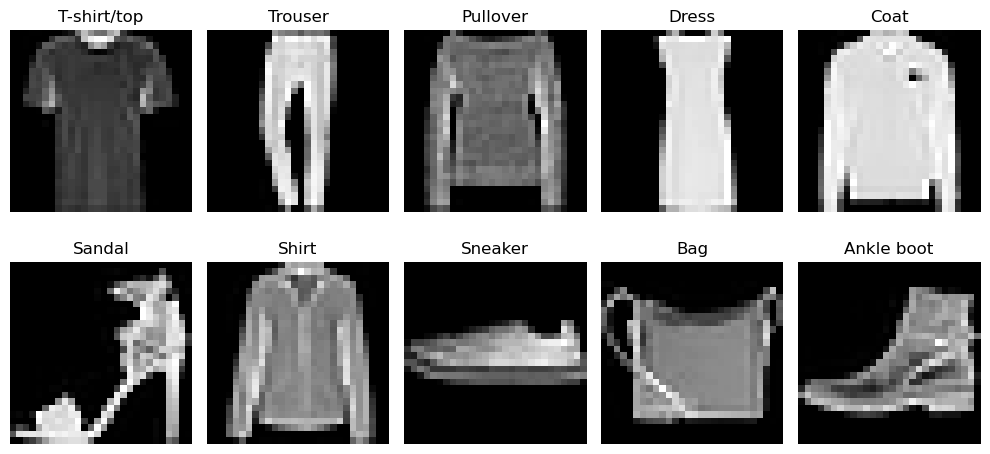

In [8]:
plot_images(train_images, train_labels)

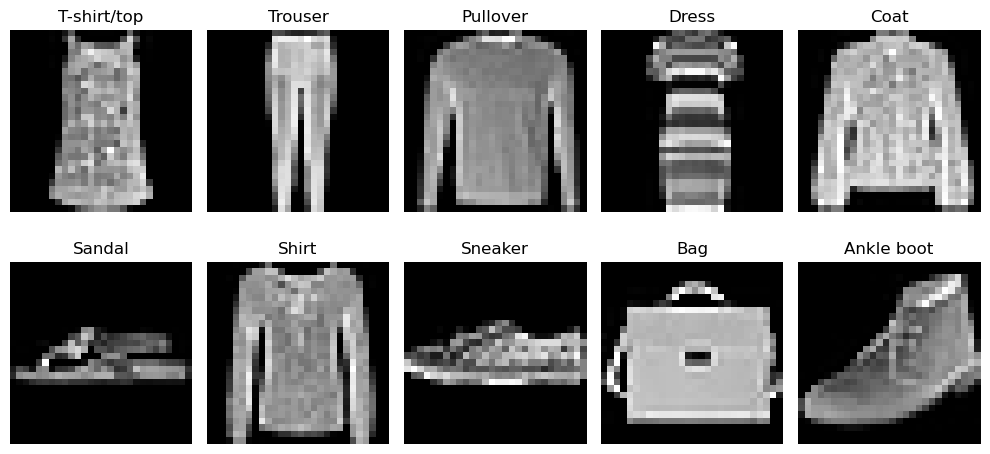

In [9]:
plot_images(test_images, test_labels)

# Question 2

In [10]:
class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [np.random.randn(y, x) * np.sqrt(2/x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.zeros((y,)) for y in layer_sizes[1:]]
    
    def relu(self, A):
        return np.maximum(0, A)
    
    def softmax(self, A):
        exp_A = np.exp(A - np.max(A, axis=0, keepdims=True))
        return exp_A / np.sum(exp_A, axis=0, keepdims=True)
    
    def forward(self, X):
        h_s = [X]
        for W, b in zip(self.weights, self.biases):
            a = np.dot(W, h_s[-1]) + b
            if W is self.weights[-1]:
                h = self.softmax(a)
            else:
                h = self.relu(a)
            h_s.append(h)
        return h_s[-1]

In [11]:
model = NeuralNetwork([28*28, 50, 50, 10])

In [12]:
model.forward(train_images[np.random.randint(0,60000)].flatten())

array([1.85624556e-071, 1.15012929e-137, 3.60849572e-070, 1.41019792e-099,
       4.36479131e-012, 1.00000000e+000, 4.38041876e-149, 2.36058221e-017,
       1.40351215e-063, 2.29434201e-120])